# **Problem Statement**

In a competitive market such as the restaurant industry, comprehending the subtleties of the factors Influencing Business Success for stakeholders is crucial. This project seeks to examine the connection between user engagement, like reviews, tips, and check-ins and business success metrics, such as review count and ratings, specifically focusing on restaurants, using the Yelp dataset.

# **Research Objectives**

- Quantify the correlation between user engagement (reviews, tips, check-ins) and review count/average star rating. 

- Analyse the impact of sentiment on review count and average star rating.

- Time Trends in User Engagement

# **Hypothesis Testing**

- Increased levels of user engagement (more reviews, tips, and check-ins) Correlate with increased review counts and ratings for restaurants.
- Reviews and tips with positive sentiments significantly influence higher overall ratings and increase the number of reviews for restaurants.
- Consistent interaction over a period is associated with long-term success for restaurants.


## **Importing Libraries**

In [2]:
import os
os.chdir('D:/yelp_project/')
print("Working directory:", os.getcwd())


Working directory: D:\yelp_project


In [3]:
import sqlite3
import pandas as pd
from IPython.display import display


# **Data Overview** 

- This dataset is a subset of Yelp and contains information about various businesses.
- Yelp provides the initial data in JSON file format.
- The five JSON files are business, review, user, tip and checkin.
- The JSON files are stored in the database for easy retrieval of data.

In [4]:
conn = sqlite3.connect('D:/yelp_project/yelp.db')


In [5]:
# List all tables in the database
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(query, conn)
display(tables)


,name
0,business
1,checkin
2,review
3,tip
4,user


In [6]:
# Check sample data from each table

tables = ['business', 'checkin', 'review', 'tip', 'user']

for table in tables:
    print(f"--- Sample from {table} ---")
    query = f"SELECT * FROM {table} LIMIT 5;"
    sample = pd.read_sql_query(query, conn)
    display(sample)


--- Sample from business ---


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,"Doctors, Traditional Chinese Medicine, Naturop..."
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,"Shipping Centers, Local Services, Notaries, Ma..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"Department Stores, Shopping, Fashion, Home & G..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"Brewpubs, Breweries, Food"


--- Sample from checkin ---


,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


--- Sample from review ---


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


--- Sample from tip ---


,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


--- Sample from user ---


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


# **Data Analysis**


In [7]:
# Total business count
pd.read_sql_query("SELECT count(*) FROM business", conn)


,count(*)
0,150346


In [8]:
import pandas as pd

# Business IDs and review counts
business_id = pd.read_sql_query("""select business_id, review_count from business where lower(categories) like '%restaurant%' and is_open = 1""", conn)


In [9]:
# What is the descriptive stats for review count and star rating for businesses?
# avg, min, max, median

pd.read_sql_query(f"""SELECT
  AVG(review_count) AS average_review_count,
  MIN(review_count) AS min_review_count,
  MAX(review_count) AS max_review_count,
  (SELECT review_count FROM business ORDER BY review_count LIMIT 1 OFFSET (SELECT COUNT(*) FROM business) / 2) AS median_review_count,
  
  AVG(stars) AS average_star_rating,
  MIN(stars) AS min_star_rating,
  MAX(stars) AS max_star_rating,
  (SELECT stars FROM business ORDER BY stars LIMIT 1 OFFSET (SELECT COUNT(*) FROM business) / 2) AS median_star_rating
  
FROM business 
WHERE business_id IN {tuple(business_id['business_id'])};
""", conn).transpose()


,0
average_review_count,104.097789
min_review_count,5.000000
max_review_count,7568.000000
median_review_count,15.000000
average_star_rating,3.523969
min_star_rating,1.000000
max_star_rating,5.000000
median_star_rating,3.500000


In [10]:
# function for removing outliers using interquartile range
def remove_outliers(df, col):
    q1 = df[col].quantile(0.25)  
    q3 = df[col].quantile(0.75)  
    iqr = q3 - q1 
    lower_bound = q1 - 1.5 * iqr  
    upper_bound = q3 + 1.5 * iqr  
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]  
    return df




In [11]:
business_id = remove_outliers(business_id, 'review_count')

In [12]:
business_id.shape

(31537, 2)

In [13]:
pd.read_sql_query(f"""SELECT
  AVG(review_count) AS average_review_count,
  MIN(review_count) AS min_review_count,
  MAX(review_count) AS max_review_count,
  (SELECT review_count FROM business ORDER BY review_count LIMIT 1 OFFSET (SELECT COUNT(*) FROM business) / 2) AS median_review_count,
  
  AVG(stars) AS average_star_rating,
  MIN(stars) AS min_star_rating,
  MAX(stars) AS max_star_rating,
  (SELECT stars FROM business ORDER BY stars LIMIT 1 OFFSET (SELECT COUNT(*) FROM business) / 2) AS median_star_rating
  
FROM business 
WHERE business_id IN {tuple(business_id['business_id'])};
""", conn).transpose()


,0
average_review_count,55.975426
min_review_count,5.000000
max_review_count,248.000000
median_review_count,15.000000
average_star_rating,3.477281
min_star_rating,1.000000
max_star_rating,5.000000
median_star_rating,3.500000


In [14]:
# Which restaurants have the highest number of reviews?
pd.read_sql_query(f"""
SELECT name, SUM(review_count) as review_count, AVG(stars) AS avg_rating
FROM business
WHERE business_id IN {tuple(business_id['business_id'])}
GROUP BY name
ORDER BY review_count DESC
LIMIT 10;
""", conn)


,name,review_count,avg_rating
0,McDonald's,16490,1.868702
1,Chipotle Mexican Grill,9071,2.381757
2,Taco Bell,8017,2.141813
3,Chick-fil-A,7687,3.377419
4,First Watch,6761,3.875000
5,Panera Bread,6613,2.661905
6,Buffalo Wild Wings,6483,2.344828
7,Domino's Pizza,6091,2.290210
8,Wendy's,5930,2.030159
9,Chili's,5744,2.514706


In [15]:
# Which restaurants have the highest rating?
pd.read_sql_query(f"""
SELECT name, SUM(review_count) as review_count, AVG(stars) AS avg_rating
FROM business
WHERE business_id IN {tuple(business_id['business_id'])}
GROUP BY name
ORDER BY avg_rating DESC
LIMIT 10;
""", conn)


,name,review_count,avg_rating
0,ā café,48,5.0
1,two birds cafe,77,5.0
2,the brewers cabinet production,13,5.0
3,taqueria la cañada,17,5.0
4,la bamba,44,5.0
5,la 5th av tacos,24,5.0
6,el sabor mexican and chinese food,21,5.0
7,eat.drink.Om...YOGA CAFE,7,5.0
8,d4 Tabletop Gaming Cafe,8,5.0
9,cabbage vegetarian cafe,12,5.0


- No direct correlation : Higher rating do not gauarantee a higher review count.
- Review count refelcts user engagement but not necessarily overall customer satisfaction
- Success in the restaurant business is not solely determined by rating or review count

In [16]:
# Do restaurants with higher engagement tend to have higher ratings?
 
pd.read_sql_query("""select business_id,
 sum(length(date) - length(replace(date,',',''))+1) as checkin_count
 from checkin
 group by business_id
 """,conn)



,business_id,checkin_count
0,---kPU91CF4Lq2-WlRu9Lw,11
1,--0iUa4sNDFiZFrAdIWhZQ,10
2,--30_8IhuyMHbSOcNWd6DQ,2
3,--7PUidqRWpRSpXebiyxTg,10
4,--7jw19RH9JKXgFohspgQw,26
...,...,...
131925,zznJox6-nmXlGYNWgTDwQQ,67
131926,zznZqH9CiAznbkV6fXyHWA,1
131927,zzu6_r3DxBJuXcjnOYVdTw,23
131928,zzw66H6hVjXQEt0Js3Mo4A,2


In [17]:
pd.read_sql_query("""SELECT business_id, count(*)
FROM tip
GROUP BY business_id
""", conn)


,business_id,count(*)
0,---kPU91CF4Lq2-WlRu9Lw,4
1,--0iUa4sNDFiZFrAdIWhZQ,6
2,--30_8IhuyMHbSOcNWd6DQ,1
3,--7PUidqRWpRSpXebiyxTg,3
4,--8IbOsAAxjKRoYsBFL-PA,4
...,...,...
106188,zzjCxn89a7RQo8keIOO_Ag,1
106189,zzjFdJwXuxBOGe9JeY_EMw,2
106190,zznJox6-nmXlGYNWgTDwQQ,6
106191,zzu6_r3DxBJuXcjnOYVdTw,2


In [18]:
# Do restaurants with higher engagement tend to have higher ratings?
review_count_df = pd.read_sql_query(f"""
SELECT total.avg_rating as rating,
AVG(total.review_count) as avg_review_count,
AVG(total.checkin_count) as avg_checkin_count,
AVG(total.tip_count) as avg_tip_count
FROM
(SELECT
        b.business_id,
        SUM(b.review_count) AS review_count,
        AVG(b.stars) AS avg_rating,
        SUM(LENGTH(cc.date) - LENGTH(REPLACE(cc.date, ',', '')) + 1) AS checkin_count,
        SUM(tip.tip_count) as tip_count
FROM
    business b
LEFT JOIN
        checkin cc ON b.business_id = cc.business_id
LEFT JOIN
        (SELECT business_id, count(business_id) as tip_count FROM tip GROUP BY business_id ORDER BY tip_count) as tip
    ON b.business_id = tip.business_id
WHERE b.business_id IN {tuple(business_id['business_id'])}
GROUP BY
        b.business_id) as total

GROUP BY total.avg_rating
""", conn)




In [19]:
display(review_count_df)


,rating,avg_review_count,avg_checkin_count,avg_tip_count
0,1.0,14.365079,17.518072,2.781513
1,1.5,24.358459,34.480969,3.884654
2,2.0,27.759629,52.386515,4.581058
3,2.5,36.631037,79.349429,6.325225
4,3.0,48.054998,105.970405,8.301950
5,3.5,63.730125,125.781702,10.320786
6,4.0,73.136954,127.139075,11.329362
7,4.5,65.282554,86.177605,8.995201
8,5.0,31.127979,27.545113,4.269082


In [20]:
import matplotlib.pyplot as plt


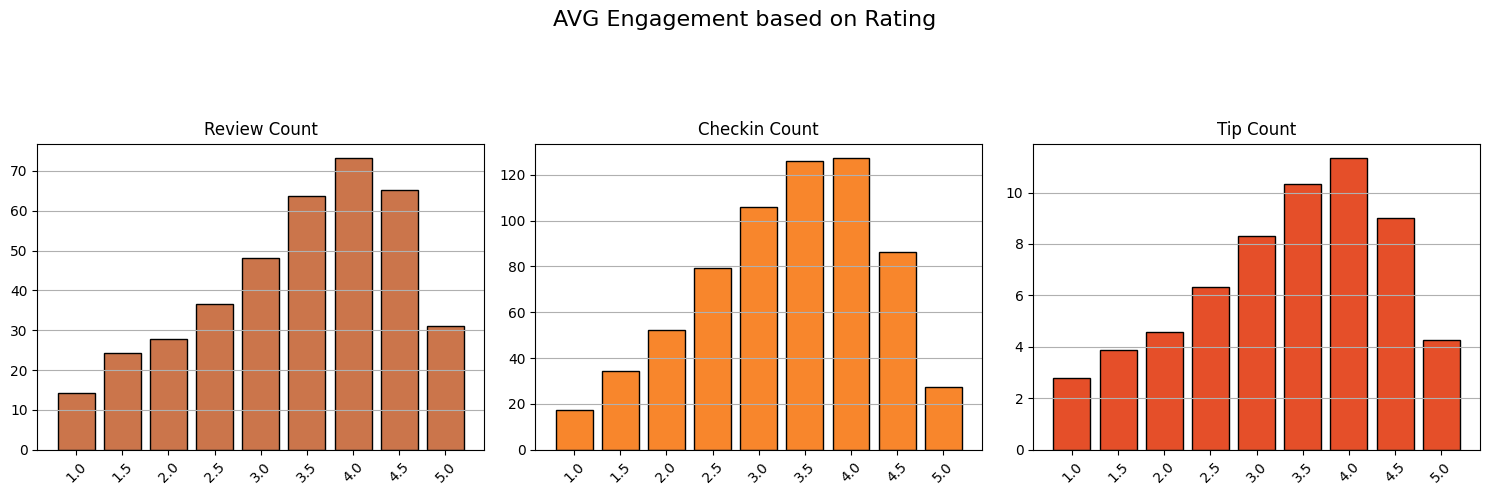

In [21]:
plt.figure(figsize=(15, 5))  # Make the figure larger and horizontal
plt.suptitle('AVG Engagement based on Rating\n\n', fontsize=16)

# Review Count Plot
plt.subplot(1, 3, 1)
plt.title('Review Count')
plt.bar(review_count_df['rating'].astype(str), review_count_df['avg_review_count'], edgecolor='k', color='#CB754B')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Checkin Count Plot
plt.subplot(1, 3, 2)
plt.title('Checkin Count')
plt.bar(review_count_df['rating'].astype(str), review_count_df['avg_checkin_count'], edgecolor='k', color='#F8862C')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Tip Count Plot
plt.subplot(1, 3, 3)
plt.title('Tip Count')
plt.bar(review_count_df['rating'].astype(str), review_count_df['avg_tip_count'], edgecolor='k', color='#E54F29')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout so the title fits
plt.show()


- Data indicates a general rise in average reviews, check-ins, and tip counts.

- Ratings have significantly improved, jumping from 1 to 4 stars.  -

- Restaurants with a 4-star rating show the most engagement; however, engagement decreases for those with ratings above 4 stars.

- This decline at the 5-star level could indicate a saturation point, where fewer customers feel inclined to leave reviews, or it may suggest selectivity, indicating that only a small, highly satisfied group visits these establishments.

In [22]:
# Is there a correlation between the number of reviews, tips, and check-ins for a business?
engagement_df = pd.read_sql_query(f"""
SELECT
    b.business_id,
    SUM(b.review_count) AS review_count,
    AVG(b.stars) AS avg_rating,
    SUM(LENGTH(cc.date) - LENGTH(REPLACE(cc.date, ',', '')) + 1) AS checkin_count,
    SUM(tip.tip_count) as tip_count
FROM
    business b
LEFT JOIN
    checkin cc ON b.business_id = cc.business_id
LEFT JOIN
    (SELECT business_id, count(business_id) as tip_count FROM tip GROUP BY business_id ORDER BY tip_count) as tip
    ON b.business_id = tip.business_id
WHERE
    b.business_id IN {tuple(business_id['business_id'])}
GROUP BY
    b.business_id
""", conn).dropna()


In [23]:
print(review_count_df)


   rating  avg_review_count  avg_checkin_count  avg_tip_count
0     1.0         14.365079          17.518072       2.781513
1     1.5         24.358459          34.480969       3.884654
2     2.0         27.759629          52.386515       4.581058
3     2.5         36.631037          79.349429       6.325225
4     3.0         48.054998         105.970405       8.301950
5     3.5         63.730125         125.781702      10.320786
6     4.0         73.136954         127.139075      11.329362
7     4.5         65.282554          86.177605       8.995201
8     5.0         31.127979          27.545113       4.269082


In [24]:
engagement_df [['review_count' , 'checkin_count' , 'tip_count']].corr()

,review_count,checkin_count,tip_count
review_count,1.000000,0.626884,0.766321
checkin_count,0.626884,1.000000,0.772088
tip_count,0.766321,0.772088,1.000000


<Axes: >

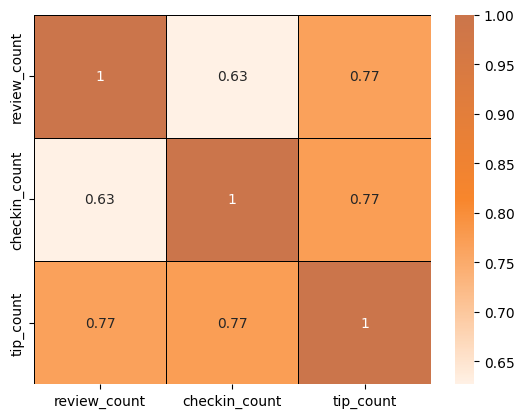

In [25]:
# Define a custom colormap for the heatmap visualization
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

colors = ['#FFF1E5', "#F8862C", "#CB754B"]
custom_cmap = LinearSegmentedColormap.from_list("mycmap", colors)
sns.heatmap(engagement_df [['review_count', 'checkin_count', 'tip_count']].corr(), cmap = custom_cmap, annot = True, linewidths=0.5, linecolor = 'black')

- These correlations indicate that user engagement varies across different platforms. User Engagement: The Connection Between Reviews, Tips, and
  Check-in Reviews, tips, and check-ins are interconnected; when activity rises in one area, it often boosts activity in the others as well.

- Businesses should implement strategies that promote all kinds of user engagement, as growth in one area tends to stimulate growth in others. This comprehensive approach will enhance visibility and improve customer interaction.


In [26]:
# Is there a difference in the user engagement (reviews, tips, and check-ins) between high-rated and low-rated businesses?
engagement_df = pd.read_sql_query(f"""
SELECT
    b.business_id,
    SUM(b.review_count) AS review_count,
    AVG(b.stars) AS avg_rating,
    SUM(LENGTH(cc.date) - LENGTH(REPLACE(cc.date, ',', '')) + 1) AS checkin_count,
    SUM(tip.tip_count) AS tip_count,
    (CASE WHEN b.stars >= 3.5 THEN 'High-Rated' ELSE 'Low-Rated' END) AS category
FROM
    business b
LEFT JOIN
    checkin cc ON b.business_id = cc.business_id
LEFT JOIN
    (SELECT business_id, COUNT(business_id) AS tip_count FROM tip GROUP BY business_id ORDER BY tip_count) AS tip
    ON b.business_id = tip.business_id
WHERE
    b.business_id IN {tuple(business_id['business_id'])}
GROUP BY
    b.business_id
""", conn).dropna()


In [27]:
# Check the difference in engagement between High-Rated and Low-Rated businesses
engagement_df.groupby('category')[['review_count', 'checkin_count', 'tip_count']].mean()


,review_count,checkin_count,tip_count
category,,,
High-Rated,72.291062,122.066641,10.162766
Low-Rated,42.123420,88.880828,6.541689


- There is a noticeable connection between elevated ratings and improved user engagement in reviews, tips, and check-ins.

- This trend underscores the importance of maintaining exceptional service and high-quality standards. These practices appear to encourage more reviews, check-ins, and tips, which are crucial metrics for gauging customer engagement and satisfaction.

In [28]:
# function to calculate the success score based on the avg rating and total review count
def calculate_success_metric(df):
    success_score = []
    for index, row in df.iterrows():
        score = row['avg_rating'] * np.log(row['review_count'] + 1)
        success_score.append(score)
    return success_score


In [29]:
import numpy as np


In [30]:
# How do success metrices (review_count or avg_rating) of restaurants vary across diffrent states and cities?
city_df = pd.read_sql_query(f"""select city, state, latitude, longitude, AVG(stars) as avg_rating, SUM(review_count) as review_count, 
count(*) as restaurant_count
from business
where business_id IN {tuple(business_id['business_id'])}
group by state, city
order by review_count desc
limit 10""" , conn)

# Apply the success score calculation function to the dataframe
city_df['success_score'] = calculate_success_metric(city_df)



In [31]:
city_df

,city,state,latitude,longitude,avg_rating,review_count,restaurant_count,success_score
0,Philadelphia,PA,39.955505,-75.155564,3.532156,175487,3001,42.651934
1,Tampa,FL,27.890814,-82.502346,3.571429,104376,1715,41.270588
2,Indianapolis,IN,39.637133,-86.127217,3.412111,92639,1701,39.022521
3,Tucson,AZ,32.338572,-111.010760,3.386187,91613,1419,38.688341
4,Nashville,TN,36.208102,-86.768170,3.493590,87070,1404,39.737764
5,New Orleans,LA,29.963974,-90.042604,3.693676,69239,1012,41.167252
6,Saint Louis,MO,38.583223,-90.407187,3.414303,51490,811,37.042331
7,Reno,NV,39.476518,-119.784037,3.479626,48393,589,37.535187
8,Edmonton,AB,53.436403,-113.604288,3.509379,45916,1546,37.671748
9,Boise,ID,43.611192,-116.206275,3.558824,36104,561,37.346958


In [32]:
import folium
from folium.plugins import HeatMap


In [33]:
# Create a base map
m = folium.Map(location=[city_df['latitude'].mean(), city_df['longitude'].mean()], zoom_start=4)

# Define a color scale
color_scale = folium.LinearColormap(colors=['green', 'yellow', '#E54F29'],
                                    vmin=city_df['success_score'].min(),
                                    vmax=city_df['success_score'].max())

# Add markers to the map
for index, row in city_df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=color_scale(row['success_score']),
        fill=True,
        fill_color=color_scale(row['success_score']),
        fill_opacity=0.7,
        popup=f"Success Score: {row['success_score']}"
    ).add_to(m)

# Add color scale to the map
m.add_child(color_scale)


- Philadelphia ascends to the forefront as the premier city. With the highest success score, indicating a combination of high ratings and active user engagement.

- Following Philadelphia, Tampa, Indianapolis, and Tucson rank among the top cities with significant success scores, suggesting thriving restaurant scenes in these areas.

In [34]:
# Are there any patterns in user engagement over time for successful businesses compared to less successful ones?
# Are there any seasonal trends in the user engagement for restaurants?

high_rated_engagement = pd.read_sql_query(f"""
SELECT review.month_year, review.review_count, tip.tip_count FROM
(SELECT strftime('%m-%Y', date) AS month_year, COUNT(*) AS review_count
 FROM review
 WHERE business_id IN {tuple(business_id['business_id'])} and stars >= 3.5
 GROUP BY month_year
 ORDER BY month_year) as review
JOIN
(SELECT AVG(b.stars), strftime('%m-%Y', tip.date) AS month_year, COUNT(*) AS tip_count
 FROM tip
 JOIN business as b
 on tip.business_id = b.business_id
 WHERE tip.business_id IN {tuple(business_id['business_id'])} and b.stars >= 3.5
 GROUP BY month_year
 ORDER BY month_year) as tip

on review.month_year = tip.month_year
;""", conn)

low_rated_engagement = pd.read_sql_query(f"""
SELECT review.month_year, review.review_count, tip.tip_count FROM
(SELECT strftime('%m-%Y', date) AS month_year, COUNT(*) AS review_count
 FROM review
 WHERE business_id IN {tuple(business_id['business_id'])} and stars < 3.5
 GROUP BY month_year
 ORDER BY month_year) as review
JOIN
(SELECT AVG(b.stars), strftime('%m-%Y', tip.date) AS month_year, COUNT(*) AS tip_count
 FROM tip
 JOIN business as b
 on tip.business_id = b.business_id
 WHERE tip.business_id IN {tuple(business_id['business_id'])} and b.stars < 3.5
 GROUP BY month_year
 ORDER BY month_year) as tip
on review.month_year = tip.month_year
;""", conn)


In [35]:
high_rated_engagement

,month_year,review_count,tip_count
0,01-2010,43,79
1,01-2011,45,621
2,01-2012,57,1321
3,01-2013,93,1230
4,01-2014,93,1357
...,...,...,...
107,12-2013,91,1278
108,12-2014,121,1065
109,12-2015,187,1457
110,12-2016,160,1540


In [36]:
low_rated_engagement

,month_year,review_count,tip_count
0,01-2010,18,25
1,01-2011,27,297
2,01-2012,27,538
3,01-2013,44,548
4,01-2014,78,607
...,...,...,...
105,12-2013,70,552
106,12-2014,87,446
107,12-2015,87,496
108,12-2016,89,478


In [37]:
time_rating = pd.read_sql_query(f"""
SELECT strftime('%m-%Y', date) AS month_year, AVG(stars) as avg_rating
FROM review
WHERE business_id IN {tuple(business_id['business_id'])}
GROUP BY month_year
ORDER BY month_year
;""", conn)

In [38]:
time_rating

,month_year,avg_rating
0,01-2006,4.333333
1,01-2007,3.500000
2,01-2008,3.200000
3,01-2009,3.500000
4,01-2010,3.819672
...,...,...
139,12-2013,3.391304
140,12-2014,3.447115
141,12-2015,3.638686
142,12-2016,3.642570


In [39]:
time_rating['month_year'] = pd.to_datetime(time_rating['month_year'], format='%m-%Y')
time_rating.sort_values('month_year', inplace=True)
time_rating = time_rating[time_rating['month_year'] > '2013'].copy()  # Add .copy()

high_rated_engagement['month_year'] = pd.to_datetime(high_rated_engagement['month_year'], format='%m-%Y')
high_rated_engagement.sort_values('month_year', inplace=True)
high_rated_engagement = high_rated_engagement[high_rated_engagement['month_year'] > '2013'].copy()  # Add .copy()

low_rated_engagement['month_year'] = pd.to_datetime(low_rated_engagement['month_year'], format='%m-%Y')
low_rated_engagement.sort_values('month_year', inplace=True)
low_rated_engagement = low_rated_engagement[low_rated_engagement['month_year'] > '2013'].copy()  # Add .copy()


In [40]:
high_rated_engagement['avg_rating'] = time_rating['avg_rating'].values


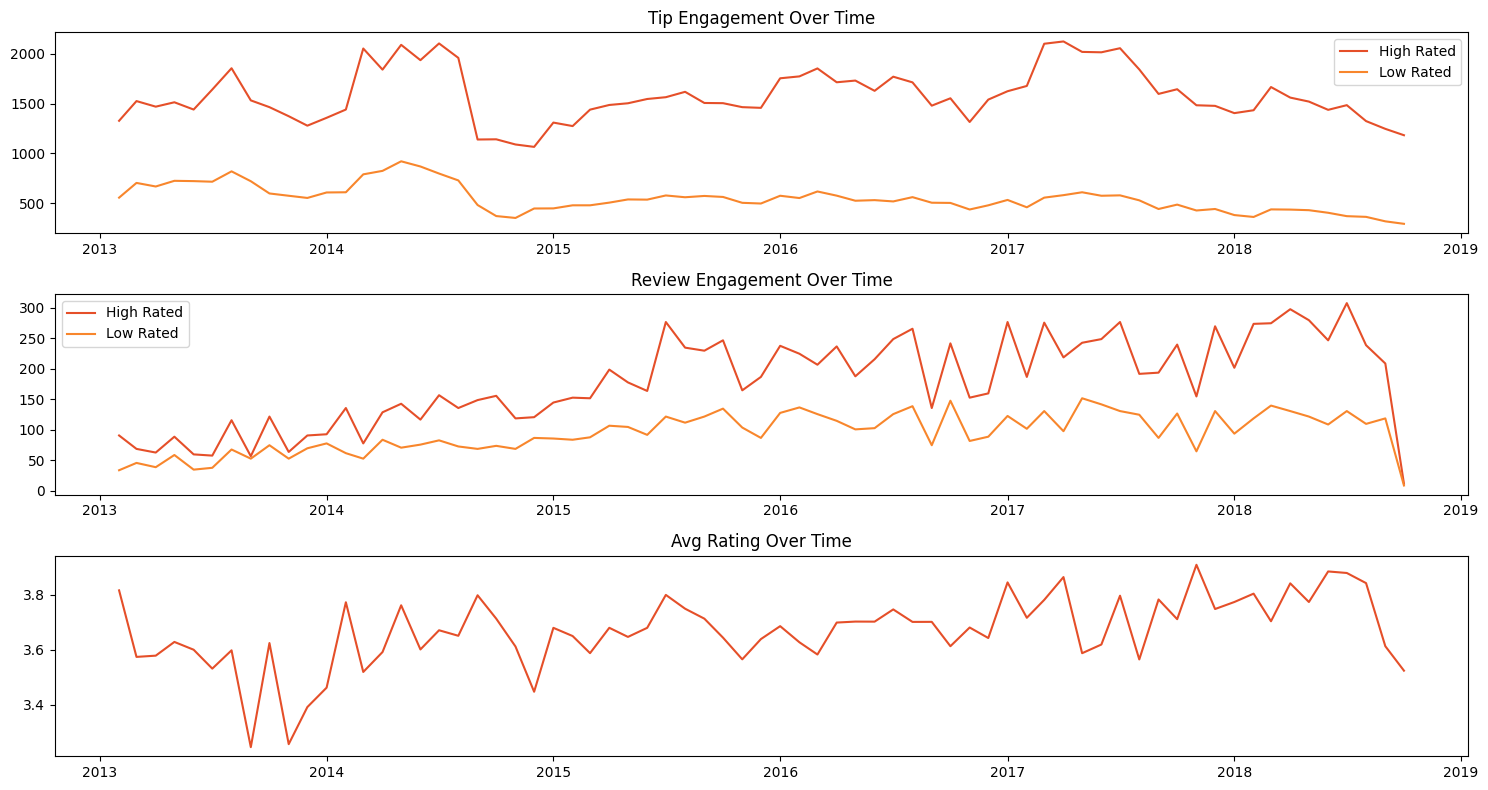

In [41]:
plt.figure(figsize = (15,8))

plt.subplot(3,1,1)
plt.title('Tip Engagement Over Time')
plt.plot(high_rated_engagement['month_year'], high_rated_engagement['tip_count'], label = 'High Rated', color = '#E54F29')
plt.plot(low_rated_engagement['month_year'], low_rated_engagement['tip_count'], label = 'Low Rated', color = '#F8862C')
plt.legend()

plt.subplot(3,1,2)
plt.title('Review Engagement Over Time')
plt.plot(high_rated_engagement['month_year'], high_rated_engagement['review_count'], label = 'High Rated', color = '#E54F29')
plt.plot(low_rated_engagement['month_year'], low_rated_engagement['review_count'], label = 'Low Rated', color = '#F8862C')
plt.legend()

plt.subplot(3,1,3)
plt.title('Avg Rating Over Time')
plt.plot(time_rating['month_year'], time_rating['avg_rating'], color = '#E54F29')

plt.tight_layout()
plt.show()


- Businesses that are more successful, especially those with ratings above 3.5, tend to show stable or steadily increasing user interaction over time.

- Restaurants with higher ratings often experience sustained or improving levels of engagement, indicating strong customer interest and satisfaction throughout the years.

In [42]:
tip_high_rated = high_rated_engagement[['month_year','tip_count']].set_index('month_year')
review_high_rated = high_rated_engagement[['month_year','review_count']].set_index('month_year')
rating_df = time_rating[['month_year','avg_rating']].set_index('month_year')


In [43]:
!pip install statsmodels


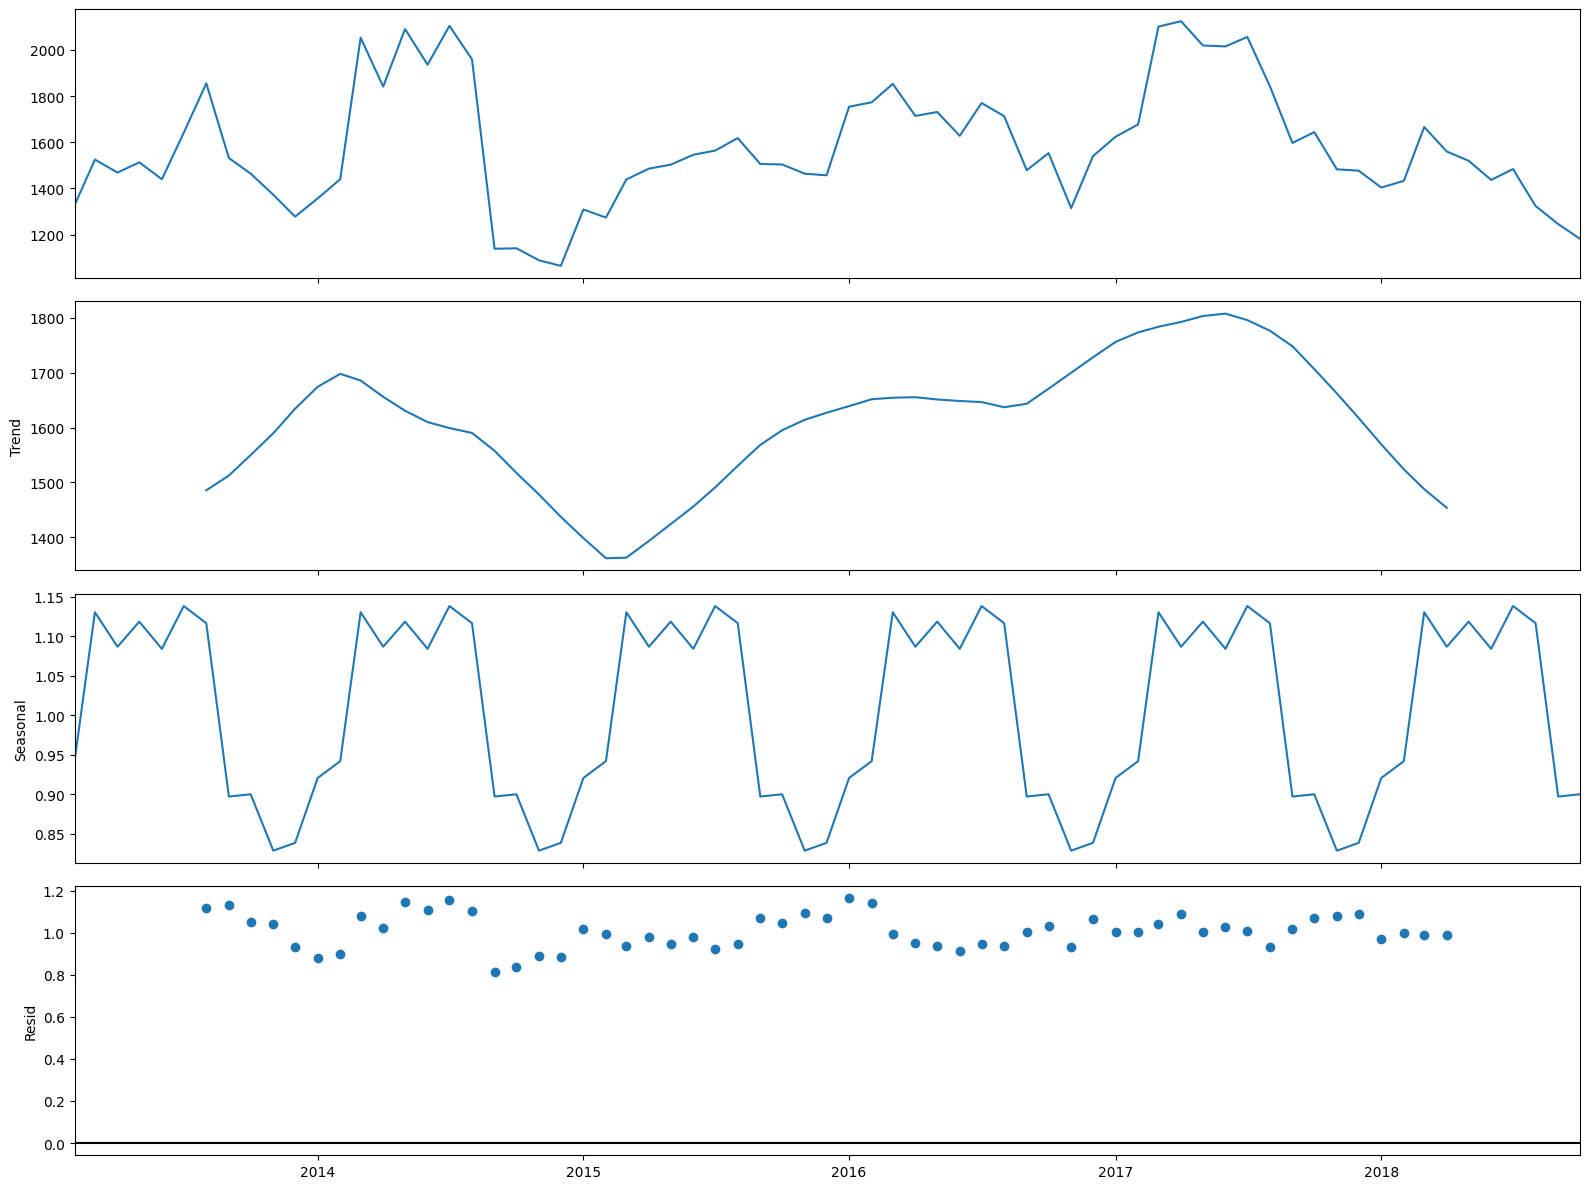

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose

multiplicative_decomposition = seasonal_decompose(tip_high_rated,
                                                  model='multiplicative',period=12)

plt.rcParams.update({'figure.figsize': (16, 12)})
multiplicative_decomposition.plot()
plt.show()


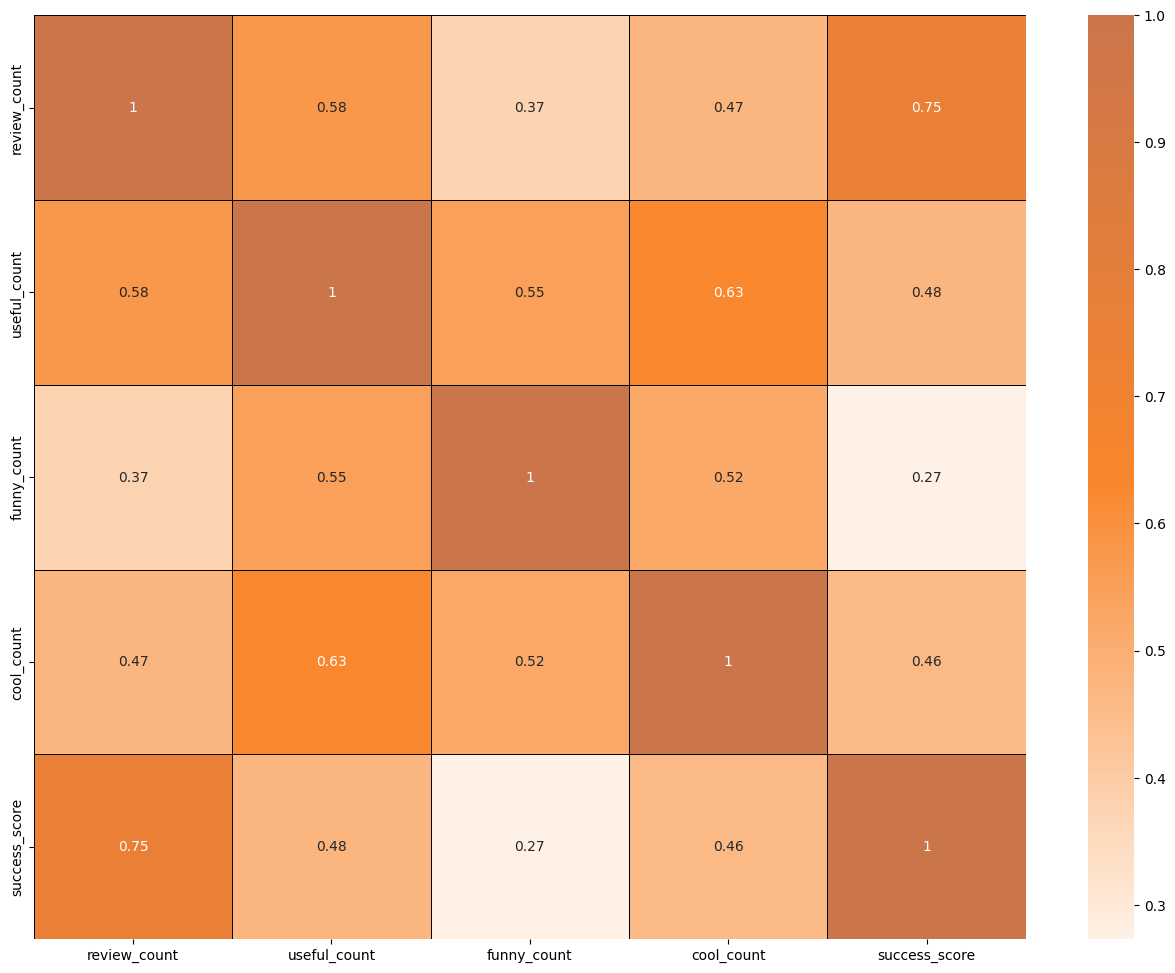

In [45]:
# How does the sentiment of reviews and tips (useful, funny, cool) correlate with the success metrics of restaurants?
sentiment_df = pd.read_sql_query(f"""SELECT b.business_id, AVG(b.stars) as avg_rating, SUM(b.review_count) as review_count, 
SUM(s.useful_count) as useful_count,
SUM(s.funny_count) as funny_count,
SUM(s.cool_count) as cool_count
FROM
    (SELECT business_id,
        SUM(useful) as useful_count,
        SUM(funny) as funny_count,
        SUM(cool) as cool_count
    FROM
        review
    GROUP BY business_id) as s
JOIN business as b on b.business_id = s.business_id

WHERE b.business_id IN {tuple(business_id['business_id'])}
GROUP BY b.business_id 
ORDER BY review_count""",conn)

sentiment_df = remove_outliers(sentiment_df,'review_count')
sentiment_df = remove_outliers(sentiment_df,'useful_count')
sentiment_df = remove_outliers(sentiment_df,'funny_count')
sentiment_df = remove_outliers(sentiment_df,'cool_count')

sentiment_df['success_score'] = calculate_success_metric(sentiment_df)

sns.heatmap(sentiment_df.iloc[:,2:].corr(), cmap = custom_cmap, annot = True, linewidths=0.5, linecolor = 'black')

plt.show()


- User reviews often include labels like “useful,” “funny,” and “cool,” which reflect how users perceive the helpfulness, entertainment value, or appeal of the feedback.

- A larger number of reviews marked as useful, funny, or cool indicates increased customer interaction and satisfaction—important elements that can boost a restaurant’s overall success.


In [46]:
# Is there any difference in engagement of elite users and non elite users?
elite_df = pd.read_sql_query("""SELECT
    elite,
    COUNT(*) as num_users,
    SUM(review_count) AS total_review_count
FROM
    (SELECT
        CASE
            WHEN elite = '' THEN 'Not Elite'
            ELSE 'Elite'
        END AS elite,
        u.review_count
    FROM
        user u) AS user_elite
GROUP BY
    elite;
""", conn)

elite_df


,elite,num_users,total_review_count
0,Elite,91198,20484441
1,Not Elite,1896699,26021235


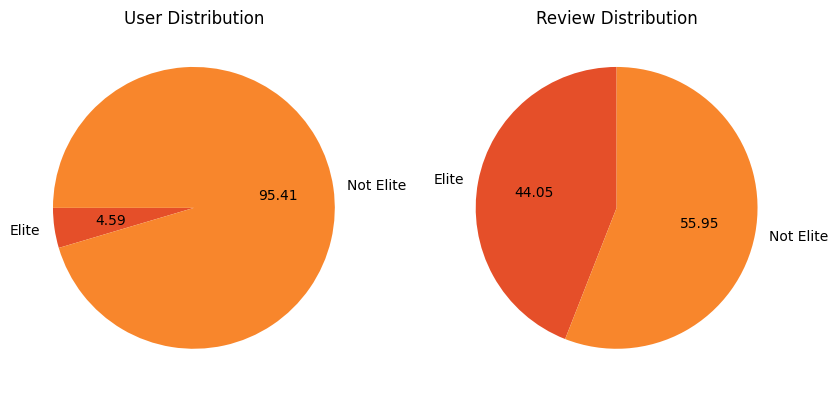

In [47]:
plt.figure(figsize=(10,6))

# User Distribution Pie Chart
plt.subplot(1, 2, 1)
plt.title('User Distribution')
plt.pie(elite_df['num_users'], labels=elite_df['elite'], autopct='%.2f', startangle=180, colors=['#E54F29', '#F8862C'])

# Review Distribution Pie Chart
plt.subplot(1, 2, 2)
plt.title('Review Distribution')
plt.pie(elite_df['total_review_count'], labels=elite_df['elite'], autopct='%.2f', startangle=90, colors=['#E54F29', '#F8862C'])

plt.show()



- Yelp designates certain users as “Elite” based on their consistent, high-quality contributions and active participation on the platform.
  
- Even though elite users make up a small portion of the community, they account for a significant share of the overall reviews, far outweighing the input from non-elite users.

- Building strong relationships with elite users can encourage repeat patronage and customer loyalty, as these users are more inclined to support businesses they trust and enjoy.

In [48]:
from datetime import datetime


In [49]:
# What are the busiest hours for restaurants?
review_engagement = pd.read_sql_query("""
SELECT
    cast(strftime('%H', date) as integer) as hour,
    COUNT(*) AS review_count
FROM
    review
GROUP BY
    hour;
""", conn)

tip_engagement = pd.read_sql_query(f"""
SELECT
    cast(strftime('%H', date) as integer) as hour,
    COUNT(*) AS tip_count
FROM
    tip
GROUP BY
    hour;
""", conn)

checkin = pd.read_sql_query("""SELECT date FROM checkin""", conn)
checkin_engagement = []
for i in checkin['date']:
    checkin_engagement.extend([
        datetime.strptime(j.strip(), "%Y-%m-%d %H:%M:%S").strftime("%H") 
        for j in i.split(',')
    ])
checkin_engagement = pd.DataFrame(checkin_engagement).astype('int').groupby(0)[0].count()


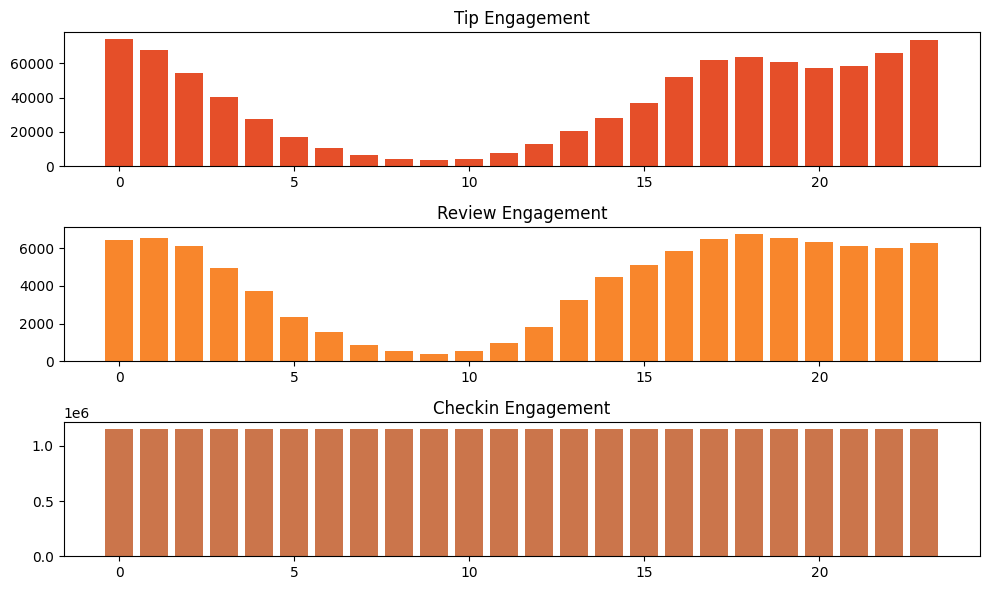

In [50]:
plt.figure(figsize = (10,6))
plt.subplot(3,1,1)
plt.title('Tip Engagement')
plt.bar(tip_engagement['hour'],tip_engagement['tip_count'], color = '#E54F29')

plt.subplot(3,1,2)
plt.title('Review Engagement')
plt.bar(review_engagement['hour'],review_engagement['review_count'], color = '#F8862C')

plt.subplot(3,1,3)
plt.title('Checkin Engagement')
plt.bar(checkin_engagement.index,checkin_engagement[0], color = '#CB754B')

plt.tight_layout()
plt.show()


### **Busiest Hours**

- Restaurants experience the highest levels of user engagement between 4 pm and 1 am, marking these as their peak operating hours.
- Identifying these busy periods helps businesses adjust staffing and resource planning to maintain smooth operations and deliver superior service
- The increased activity in the evening and nighttime likely reflects greater dining demand influenced by work hours, social events, and recreational pursuits.


In [1]:
import os

file_path = 'D:/yelp_project/yelp_academic_dataset_review.json'

if os.path.exists(file_path):
    print("File exists!")
else:
    print("File does NOT exist!")


File exists!


In [2]:
import pandas as pd

file_path = 'D:/yelp_project/yelp_academic_dataset_review.json'

# Try reading only the first 10 lines to check if it loads
review_df = pd.read_json(file_path, lines=True, nrows=10)

print("Dataset loaded successfully!")
print(review_df.head())


Dataset loaded successfully!
                review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
2  saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
3  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
4  Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ   

   stars  useful  funny  cool  \
0      3       0      0     0   
1      5       1      0     1   
2      3       0      0     0   
3      5       1      0     1   
4      4       1      0     1   

                                                text                date  
0  If you decide to eat here, just be aware it is... 2018-07-07 22:09:11  
1  I've taken a lot of spin classes over the year... 2012-01-03 15:28:18  
2  Family diner. Had the buffet. Eclectic assortm... 2014-02-05 20:30:30  
3  Wow!  

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\anush\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


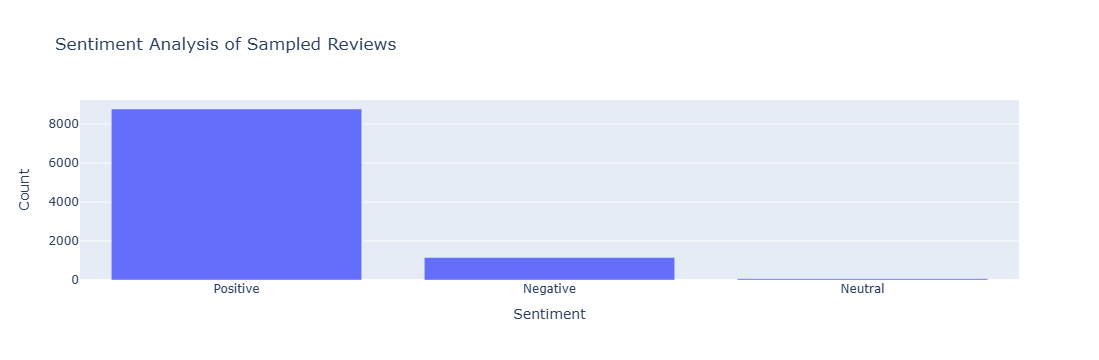

In [4]:
import pandas as pd
import plotly.express as px
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download vader_lexicon if not already done
nltk.download('vader_lexicon')

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Path to your review JSON file
file_path = 'D:/yelp_project/yelp_academic_dataset_review.json'

# Load only a sample of rows, say 10000, for fast processing
review_df = pd.read_json(file_path, lines=True, nrows=10000)

# Initialize sentiment column
review_df['sentiment'] = 'Neutral'

# Apply sentiment analysis to each review in the sample
for index, row in review_df.iterrows():
    score = sia.polarity_scores(str(row['text']))['compound']
    if score > 0:
        review_df.at[index, 'sentiment'] = 'Positive'
    elif score < 0:
        review_df.at[index, 'sentiment'] = 'Negative'

# Count how many reviews fall into each sentiment category
sentiment_counts = review_df['sentiment'].value_counts().reset_index()
sentiment_counts.columns = ['Sentiment', 'Count']

# Create a bar chart using Plotly
fig = px.bar(sentiment_counts,
             x='Sentiment',
             y='Count',
             title="Sentiment Analysis of Sampled Reviews")

fig.show()


# **Recommendations**

- By analysing factors like user engagement, review sentiments, peak hours, and the role of elite users, businesses can make strategic decisions to enhance their performance.

- Partnering with elite users and utilising their influence can strengthen marketing campaigns, boost brand visibility, and attract new customers.

- Adjusting business hours or offering targeted promotions during peak times can help restaurants better meet customer demand and improve profitability.

- Restaurants facing challenges should prioritise strategies that build long-term customer engagement, such as enhancing service quality and actively addressing customer feedback.

- Cities with strong performance metrics offer promising opportunities for restaurant chains to expand or invest further in growth initiatives.

- Analysing review sentiments helps businesses understand customer satisfaction and quickly address areas that need improvement.

- Monitoring positive and negative sentiments allows restaurants to enhance their service quality and build stronger customer relationships.
